# Exploratory Data Analysis Of Zomato Dataset

#### The aim of this project is to perform a exploratory data analysis on this data. Then a machine learning model will be built to help restuarants predict their zomato rating based the features contained in this dataset. This model will then be deployed using Flask to make restuarnt rating predictions.

In [177]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly .graph_objs as go
import plotly.offline as py
import seaborn as sns

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [180]:
df = pd.read_csv('zomato.csv')

#### Data Cleaning 

In [181]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [182]:
df.shape

(51717, 17)

In [183]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [184]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [185]:
df = df.drop(['url', 'phone'], axis=1) #Getting rid of columns that are not needed

#### Dropping Duplicated columns

In [186]:
df.duplicated().sum()

43

In [187]:
df.drop_duplicates(inplace=True)

In [188]:
df.duplicated().sum()

0

#### Dropping null values

In [189]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [190]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [191]:
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(city)':'city'})

In [192]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'listed_in(type)', 'city'],
      dtype='object')

#### Converting the datatypes of the cost and rating columns from strings into numeric values. This will make it easier to analyze, visualize and use in a machine learning model.

In [193]:
df['cost'].dtype 

dtype('O')

In [194]:
df['cost'].unique() ## The values of this fetaure are stored as an object not an integer.

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [195]:
## removing commas in the cost values
def removeCommas(x):
    return x.replace(',','')

df['cost']=df['cost'].apply(removeCommas)

In [196]:
df['cost'] = df['cost'].astype(float)

In [197]:
df['cost'].dtype ## Now this column will be easier to use in models, and visualize in plots

dtype('float64')

In [198]:
 df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [199]:
df = df.loc[df['rate'] !='NEW'] # removing values which having a rating as 'NEW'

In [200]:
def  parse(x):
    return x.replace("/5", '')

df['rate'] = df['rate'].apply(parse)  

In [201]:
df['rate']=df['rate'].astype(float)

In [202]:
df['rate'].dtype

dtype('float64')

#### Creating numeric value out of order online column. Yes is being given with avalue of 1 and No is given a value of 0.

In [203]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0

In [204]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

#### Creating numeric value out of table booking column. Yes is being given with avalue of 1 and No is given a value of 0.

In [205]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0
df.book_table = pd.to_numeric(df.book_table)
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

# Data Visualizations

#### Visualizing the restaurants with the most amount of franchises

In [206]:
franchise = df['name'].value_counts()[:20]

In [207]:
franchise # These restaurants have the most franchises

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: name, dtype: int64

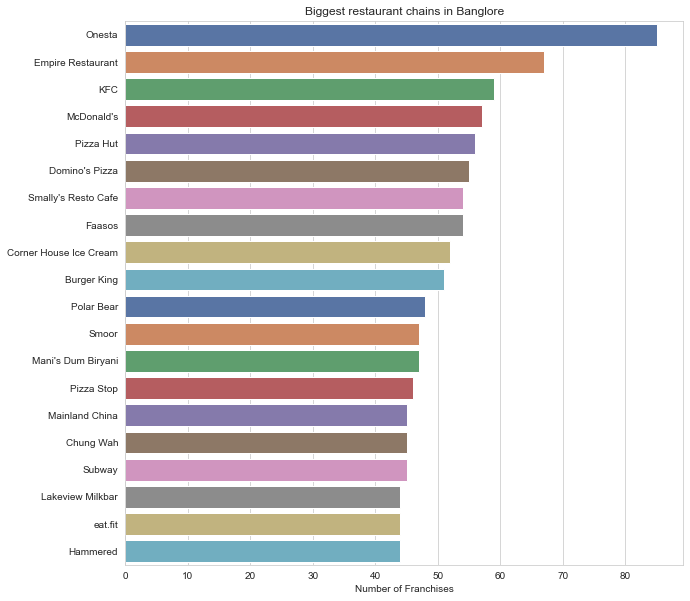

In [208]:
plt.figure(figsize=(10,10))
sns.barplot(x=franchise, y=franchise.index, palette='deep')
plt.title("Biggest restaurant chains in Banglore")
plt.xlabel("Number of Franchises");
plt.show()

### Visualizing the number of restaurants that offer table booking

In [209]:
bookingCount=df['book_table'].value_counts()

In [210]:
bookingCount

0    17191
1     6057
Name: book_table, dtype: int64

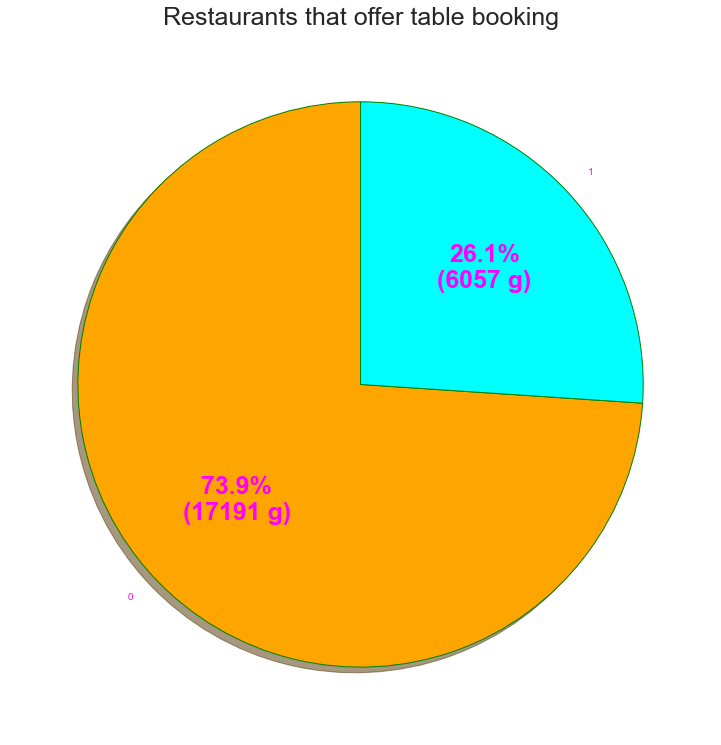

In [212]:
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(13, 13))
wedges, texts, autotexts = ax.pie(bookingCount,
                                  autopct = lambda pct: func(pct, bookingCount),
                                  labels = bookingCount.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))

plt.setp(autotexts, size = 25, weight ="bold")
ax.set_title("Restaurants that offer table booking", size=25)
 
# show plot
plt.show()

##### Most restaurants do not offer table booking.

### Visualizing the number of restaurants that offer delivery services

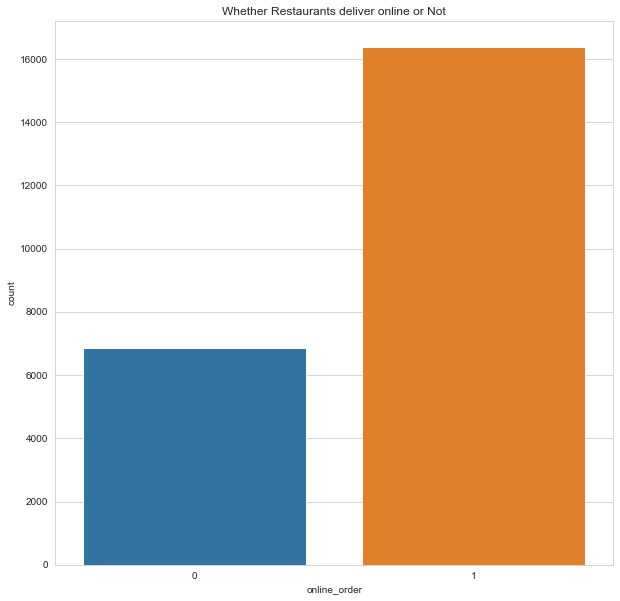

In [213]:
plt.figure(figsize=(10,10))
sns.countplot(df['online_order'])
plt.title('Whether Restaurants deliver online or Not', )
plt.show()

#### Most restaurants offer ordering online

### Distribution of Restaurant Ratings

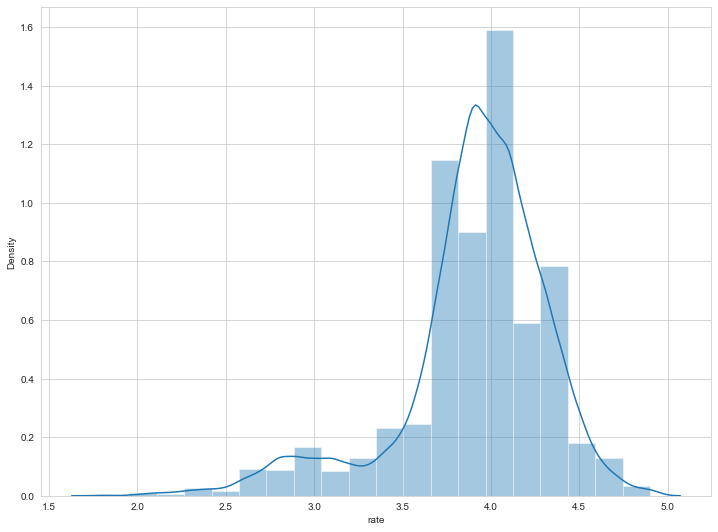

In [214]:
plt.figure(figsize=(12,9))
sns.distplot(df['rate'], bins=20, kde=True);

#### Most restaurants get a rating between 3.5 and 4.5 

In [215]:
df['rate'].max() ## Highest rating that restaurants have recived

4.9

In [216]:
df['rate'].min() ## Lowest rated restaurants. These restaurants received the lowest
                                    ## ratings

1.8

##### Number of restaurants with a rating between 2 and 3.

In [217]:

len(df[(df['rate']>=2) & (df['rate']<3)])

1179

##### Number of restaurants with a rating between 3 and 4.

In [218]:
len(df[(df['rate']>=3) & (df['rate']<4)])

10153

##### Number of restaurants with a rating between 4 and 5.

In [219]:
len(df[(df['rate']>=4) & (df['rate']<5)])

11911

#### Now it can be seen more clearly how these ratings are actually being distrubuted

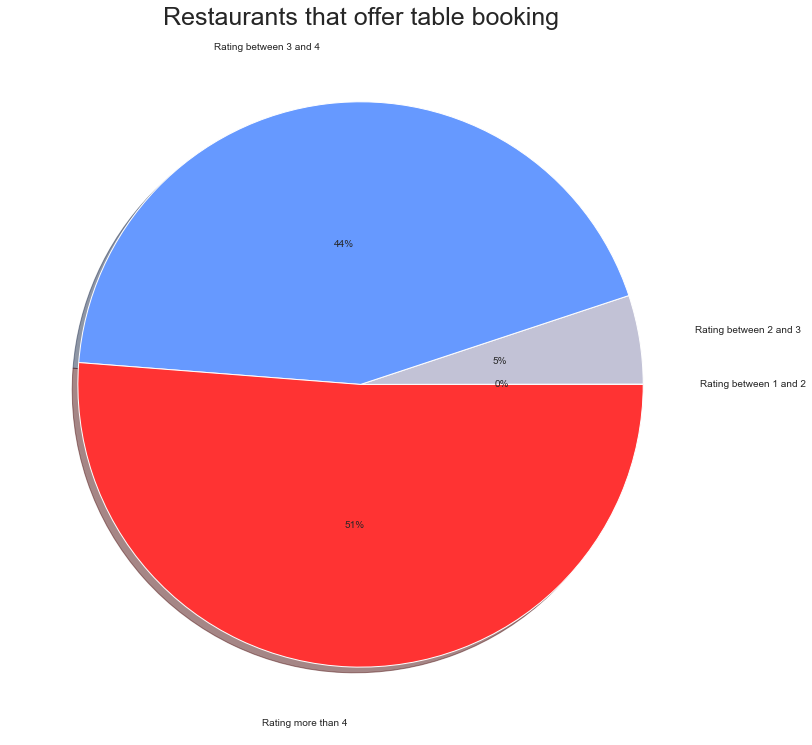

In [220]:
fig, ax = plt.subplots(figsize =(13, 13))

RatingsDistribution=[len(df[(df['rate']>=1) & (df['rate']<2)]),
        len(df[(df['rate']>=2) & (df['rate']<3)]),
        len(df[(df['rate']>=3) & (df['rate']<4)]),
        len(df[(df['rate']>=4)])]

labels=['Rating between 1 and 2','Rating between 2 and 3','Rating between 3 and 4'
        ,'Rating more than 4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(RatingsDistribution,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)

plt.setp(autotexts, size = 25, weight ="bold")
ax.set_title("Restaurants that offer table booking", size=25)
plt.show()

### Disributions of services offered by restaurants

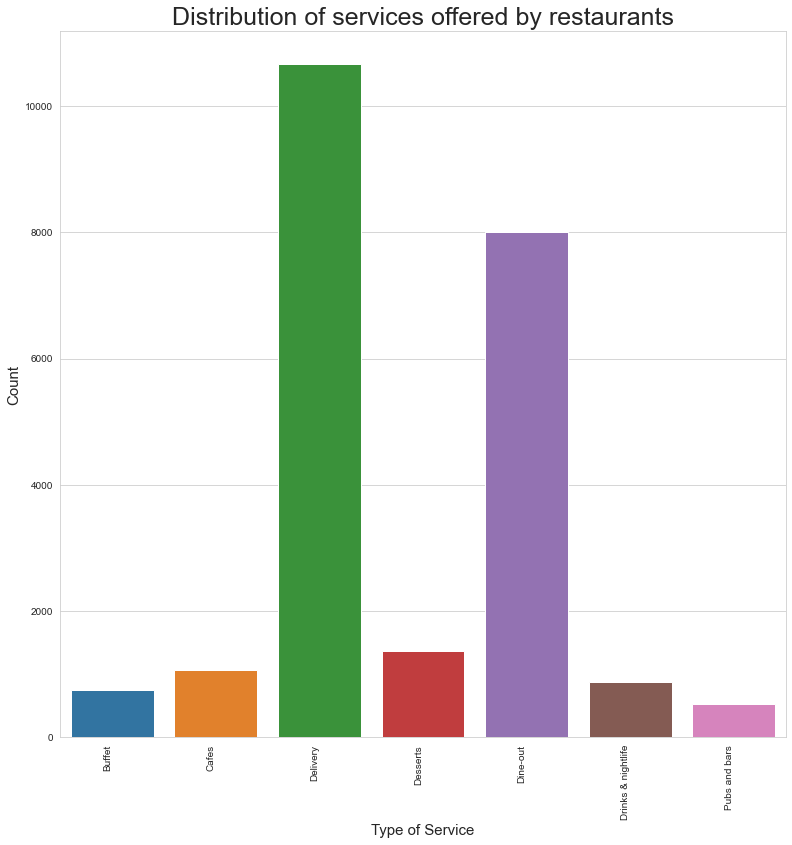

In [221]:
plt.figure(figsize=(13,13))
sns.countplot(df['listed_in(type)']).set_xticklabels(sns.countplot(df['listed_in(type)']).get_xticklabels(), rotation=90, ha="right")
plt.xlabel("Type of Service",size=15)
plt.ylabel("Count",size=15)
plt.title('Distribution of services offered by restaurants', size=25);


#### The most common services offered are delivery and dine-out

### Distribution of Cost of Food for two people

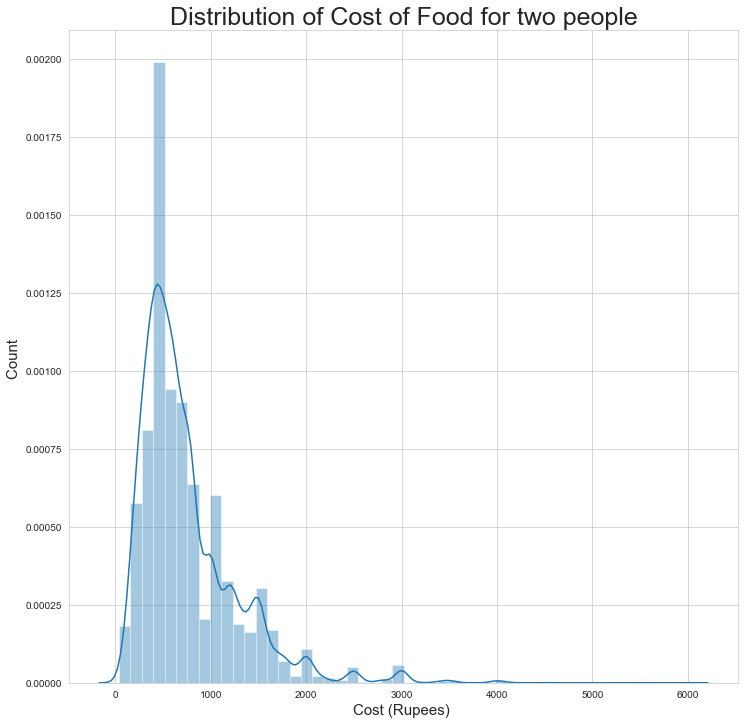

In [222]:
plt.figure(figsize=(12,12))
sns.distplot(df['cost'])
plt.title('Distribution of Cost of Food for two people', size=25)
plt.xlabel('Cost (Rupees) ', size=15)
plt.ylabel('Count ', size=15)
plt.show();

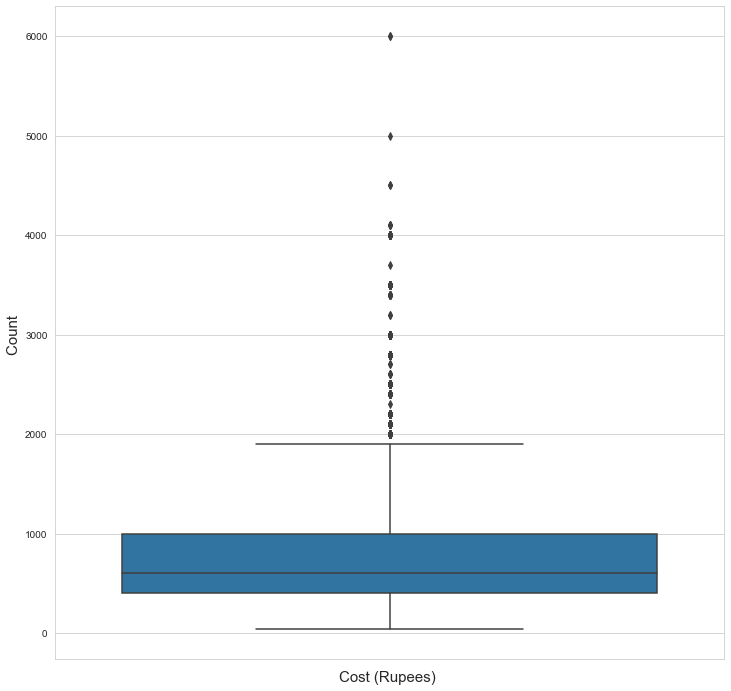

In [223]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
sns.boxplot( y = 'cost', data = df);
plt.xlabel('Cost (Rupees) ', size=15)
plt.ylabel('Count ', size=15);

#### Most dishes cost between 500 and 1000 rupees but one dish costs 6000 rupees,

### Most Liked Dishes

In [224]:
import re

df.index=range(df.shape[0])
likes=[]

## adding all the liked menu items into an array
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [225]:
df.index=range(df.shape[0])

#### Most Popular Dishes

In [226]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

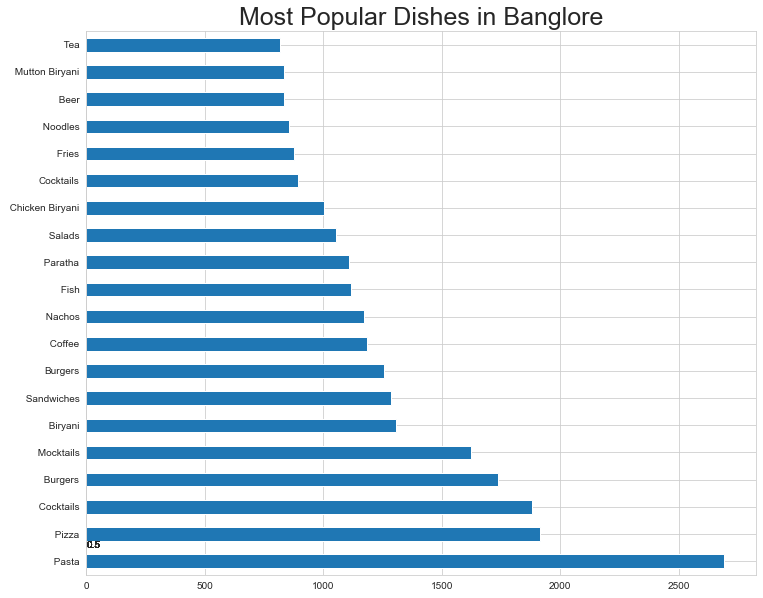

In [274]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='barh',figsize=(12,10))

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

ax.set_title("Most Popular Dishes in Banglore", size=25);

#### Graphing the number of different types of restaurants

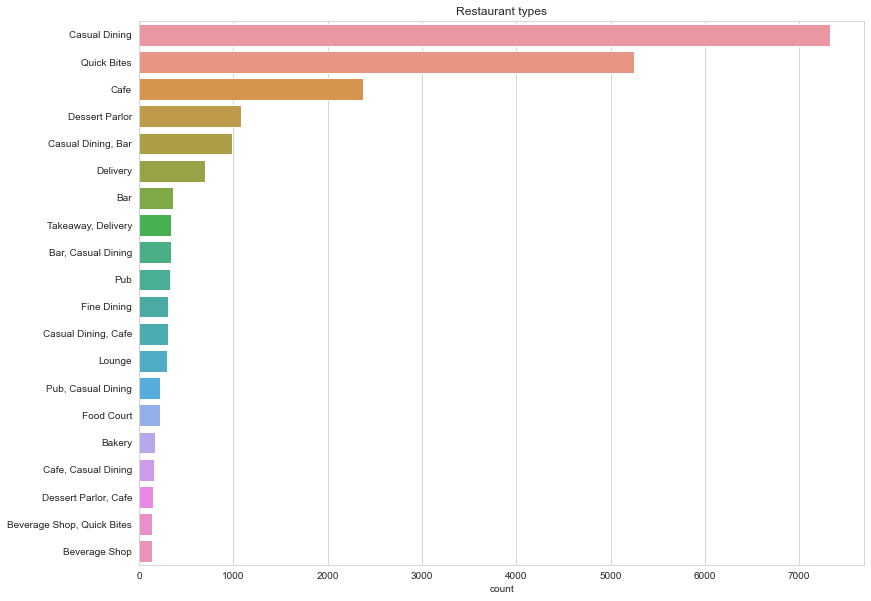

In [228]:
plt.figure(figsize=(13,10))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count");

#### The most common types of restaurants are casual dining, quick bites, and cafe's

# Building Machine Learning Model

#### Using a label encoder for the categorical variables to make it easier to build an algorithm

In [229]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [231]:
le.fit(df['location'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [234]:
countriesMapping = le_name_mapping
df.location = le.transform(df['location'])

In [237]:
df.rest_type = le.fit_transform(df.rest_type)

In [239]:
rest_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
rest_type_mapping

In [240]:
df.cuisines = le.fit_transform(df.cuisines)
cuisine_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [243]:
le.fit_transform(df.menu_item)
menu_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [245]:
df.menu_item = le.fit_transform(df.menu_item)

#### Making train and test split

In [246]:
df2=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
df2.to_csv('Zomato_df.csv') 

In [258]:
X = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [259]:
y = df['rate']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [262]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [263]:
from sklearn.metrics import r2_score

#### I am using r2 score to asses model to see how much variability of data can be explained by the model. The closer the value is to 1 the better job the model is doing at predicitng.

In [266]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.22330334842254618

#### This model is not doing a good job. Only 22% of the variability of the target can be explained by the model while the remaining 78 % of the variability is still unaccounted for.

### Random Forest

In [268]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.8803918437681498

#### This is a much better result than linear regression

### ExtraTree Regressor

In [270]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9257896854910971

#### Extra tree regrssor has the best result which will be used for the application

In [271]:
import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))